In [12]:
import numpy as np
import pandas as pd

# Đọc dữ liệu từ file CSV đã tải lên
file_path = "web_traffic.csv"
df = pd.read_csv(file_path)

# Hiển thị thông tin tổng quan về dữ liệu
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2793 non-null   object 
 1   TrafficCount  2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB


(None,
              Timestamp  TrafficCount
 0  2020-01-20 00:00:00         487.0
 1  2020-01-20 00:30:00         385.0
 2  2020-01-20 01:30:00         269.0
 3  2020-01-20 02:30:00         517.0
 4  2020-01-20 03:30:00         129.0)

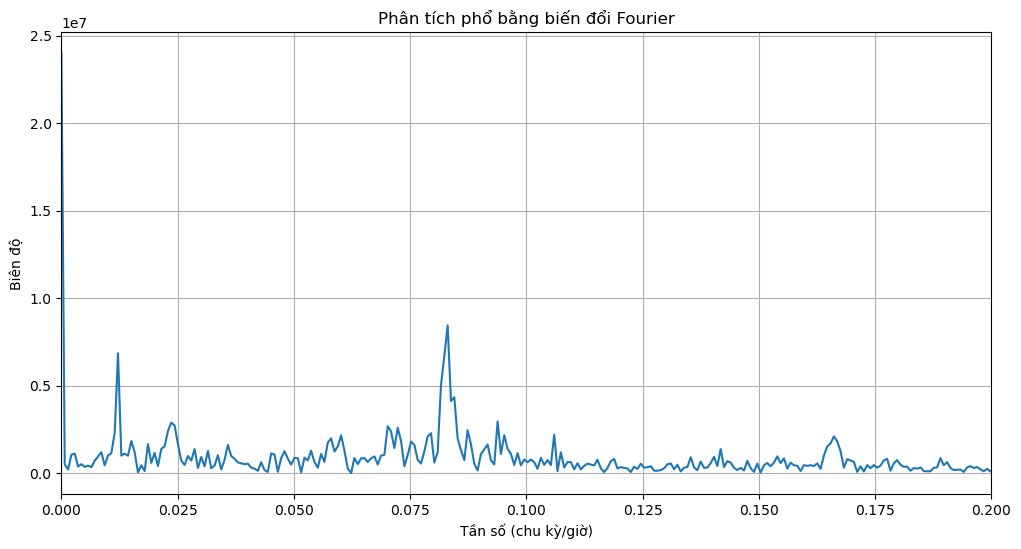

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Chuyển đổi cột thời gian sang kiểu datetime và đặt làm chỉ mục
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Lấy chuỗi giá trị lưu lượng
traffic = df['TrafficCount'].values
n = len(traffic)
timestep = 0.5  # mỗi bước là 0.5 giờ (30 phút)

# Biến đổi Fourier
fft_vals = fft(traffic)
fft_freqs = fftfreq(n, d=timestep)

# Chỉ lấy một nửa phổ do đối xứng
positive_freqs = fft_freqs[:n // 2]
positive_magnitude = np.abs(fft_vals[:n // 2])

# Trực quan hóa phổ
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_magnitude)
plt.title("Phân tích phổ bằng biến đổi Fourier")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.xlim(0, 0.2)  # chỉ lấy phần tần số thấp để dễ quan sát chu kỳ lớn
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5104\381347449.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_times = pd.date_range(df.index[-1] + pd.Timedelta(minutes=30), periods=96, freq='30T')


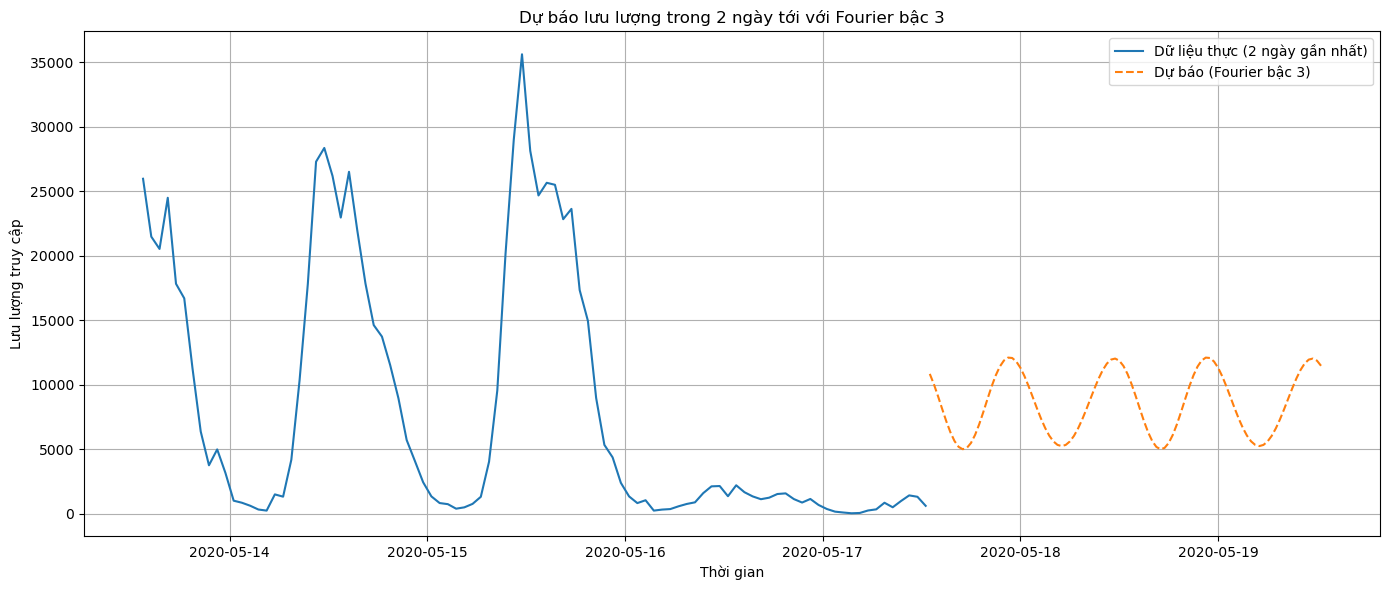

In [16]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Hàm Fourier bậc 3
def fourier_series_order3(t, a0, a1, b1, a2, b2, a3, b3):
    omega = 2 * np.pi / 24
    return (a0 +
            a1 * np.cos(omega * t) + b1 * np.sin(omega * t) +
            a2 * np.cos(2 * omega * t) + b2 * np.sin(2 * omega * t) +
            a3 * np.cos(3 * omega * t) + b3 * np.sin(3 * omega * t))

# Giả sử bạn đã có:
# - df là DataFrame đã đọc với datetime index
# - traffic là df['TrafficCount'].values
# - timestep = 0.5

t_hours = np.arange(len(traffic)) * timestep
params_order3, _ = curve_fit(fourier_series_order3, t_hours, traffic)

# Dự báo 2 ngày tới (48 giờ, mỗi 0.5 giờ)
future_hours = np.arange(len(traffic), len(traffic) + 96) * timestep
forecast_order3 = fourier_series_order3(future_hours, *params_order3)

# Vẽ biểu đồ
import pandas as pd
future_times = pd.date_range(df.index[-1] + pd.Timedelta(minutes=30), periods=96, freq='30T')
plt.figure(figsize=(14, 6))
plt.plot(df.index[-96:], traffic[-96:], label="Dữ liệu thực (2 ngày gần nhất)")
plt.plot(future_times, forecast_order3, label="Dự báo (Fourier bậc 3)", linestyle='--')
plt.title("Dự báo lưu lượng trong 2 ngày tới với Fourier bậc 3")
plt.xlabel("Thời gian")
plt.ylabel("Lưu lượng truy cập")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


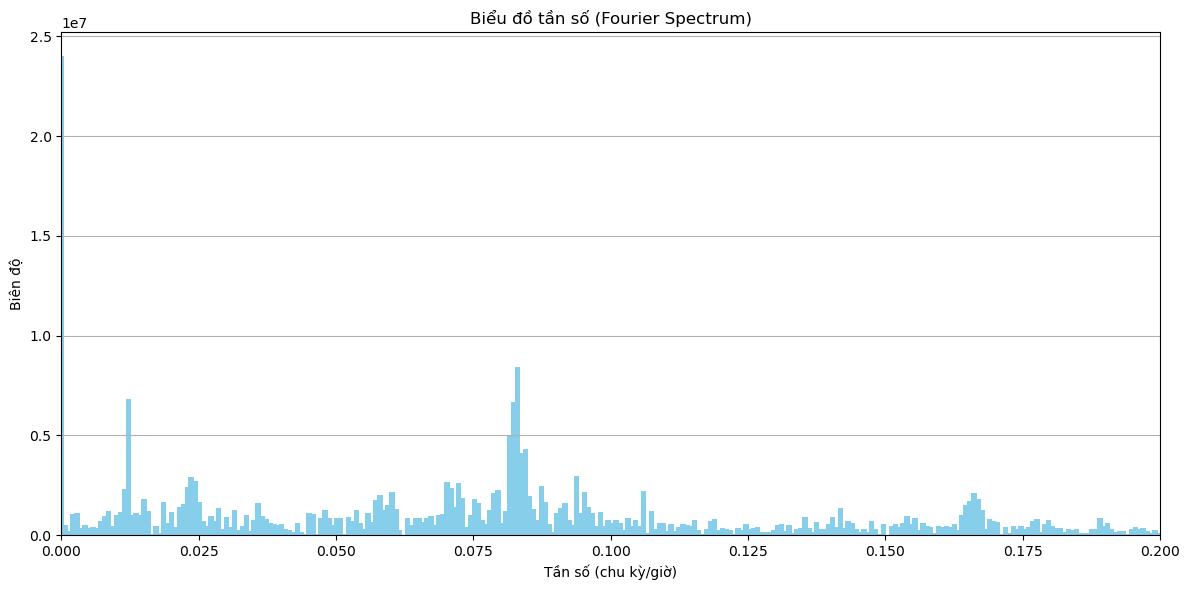

In [25]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có:
# - positive_freqs: tần số dương (chu kỳ/giờ)
# - positive_magnitude: biên độ tương ứng

plt.figure(figsize=(12, 6))
plt.bar(positive_freqs, positive_magnitude, width=0.001, color='skyblue')
plt.title("Biểu đồ tần số (Fourier Spectrum)")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.grid(True, axis='y')
plt.xlim(0, 0.2)  # chỉ hiển thị các tần số < 0.2 (chu kỳ dài hơn 5 giờ)
plt.tight_layout()
plt.show()


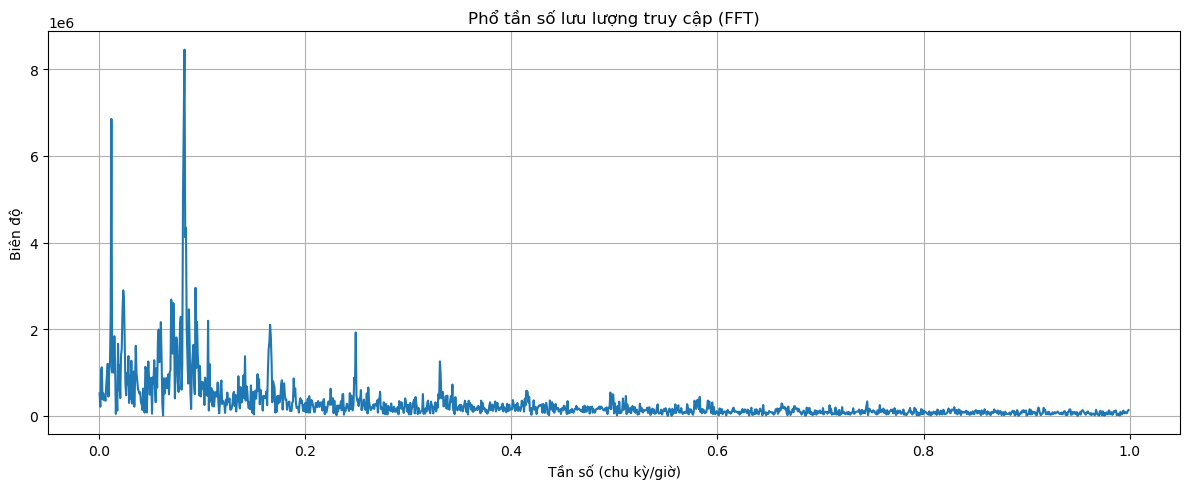

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# traffic là mảng lưu lượng truy cập
# timestep = 0.5 giờ
timestep = 0.5

# Thực hiện FFT
traffic_fft = np.fft.fft(traffic)
frequencies = np.fft.fftfreq(len(traffic), d=timestep)  # tần số (chu kỳ/giờ)

# Lấy biên độ
magnitude = np.abs(traffic_fft)

# Chỉ vẽ nửa phổ (phổ đối xứng)
half = len(frequencies) // 2

plt.figure(figsize=(12, 5))
plt.plot(frequencies[1:half], magnitude[1:half])  # bỏ tần số 0
plt.title("Phổ tần số lưu lượng truy cập (FFT)")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.tight_layout()
plt.show()
